### Step 1 : データの準備

In [16]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [15]:
from sklearn.datasets import load_boston

In [17]:
# 住宅価格サンプルデータのロード
boston = load_boston()

In [18]:
# Descriptionを表示
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Step 2 : ひとまず可視化

Text(0,0.5,'Number of houses')

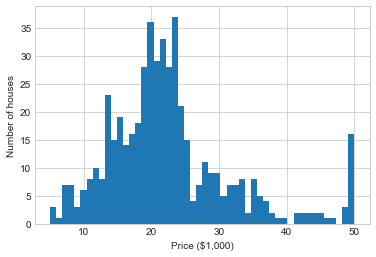

In [19]:
# 価格のヒストグラム
plt.hist(boston.target,bins=50)

plt.xlabel('Price ($1,000)')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

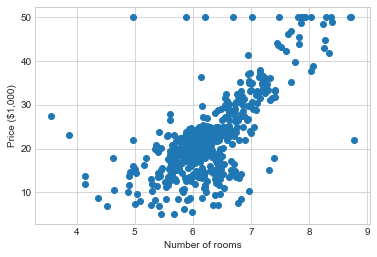

In [20]:
# 部屋の数と価格の関係を示す散布図を作成
# ラベルがRMになっている5番目の列が、部屋の数
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('Price ($1,000)')
plt.xlabel('Number of rooms')

In [21]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [22]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
# Price列を追加
boston_df['Price'] = boston.target

In [24]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/takahiro/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


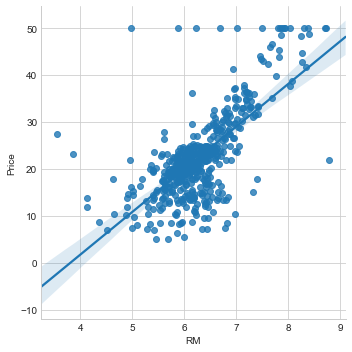

In [25]:
# lmplotを使って、回帰直線を引く
sns.lmplot('RM','Price', data=boston_df)

### Step 3 : Numpyを使った単回帰

In [32]:
X = boston_df.RM

In [35]:
X.shape

(506,)

In [86]:
# 2次元のarrayを作成
X = np.vstack(boston_df.RM)

In [37]:
X.shape

(506, 1)

In [87]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [45]:
Y = boston_df.Price

In [88]:
# Xを[X 1]の形にする
X = np.array([[value, 1] for value in X],dtype=float)

In [90]:
# 最小二乗法の計算を実行
a, b = np.linalg.lstsq(X, Y)[0]

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


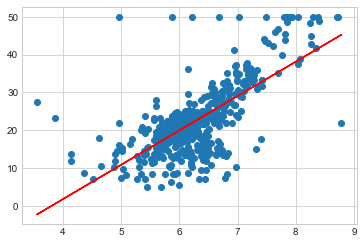

In [91]:
# 元のデータをプロット
plt.plot(boston_df.RM, boston_df.Price, 'o')

#求めた回帰直線を描く
x = boston_df.RM
plt.plot(x, a*x+b, 'r')

### Step 4 : 誤差について

In [92]:
result = np.linalg.lstsq(X, Y)

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [95]:
# 2つ目の要素に誤差の合計が入っている
error_total = result[1]

# 誤差の平均値の平方根を計算
rmse = np.sqrt(error_total/len(X))

In [96]:
print('平均二乗誤差の平方根 = {:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根 = 6.60


平均二乗誤差は、標準誤差に対応するので、95%の確率で、
この値の2倍以上誤差が広がることは無いと結論付けられる。

### Step 5 : scikit-learnを使った重回帰分析

In [109]:
import sklearn
from sklearn.linear_model import LinearRegression

In [98]:
lreg = LinearRegression()

lreg.fit() → データを元にモデルを作成

lreg.predict() → 作られたモデルを元に予測値を返却

In [99]:
# 説明変数
X_multi = boston_df.drop('Price',1)

# 目的変数
Y_target = boston_df.Price

In [100]:
# モデルの作成
lreg.fit(X_multi, Y_target)

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
# 切片の値
lreg.intercept_

36.49110328036162

In [102]:
# 係数の数
len(lreg.coef_)

13

In [103]:
coeff_df = DataFrame(boston_df.columns)

In [104]:
coeff_df.columns = ['Features']

In [106]:
# 求めた係数を代入
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

In [107]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Step 6 : 学習(Training)と検証(Validation)

In [111]:
# 説明変数をX、目的変数をYとして受け取る
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,boston_df.Price)

In [112]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [113]:
lreg = LinearRegression()

In [114]:
# 学習用のデータのみでモデルを作成
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
# 学習用のデータで予想
pred_train = lreg.predict(X_train)

In [117]:
# テスト用のデータで予想
pred_test = lreg.predict(X_test)

In [118]:
# X_trainを使ったモデルの平均二乗誤差
np.mean((Y_train - pred_train)**2) 

18.633332486555084

In [119]:
# X_testを使ったモデルの平均二乗誤差
np.mean((Y_test - pred_test)**2) 

32.92224229177161

### Step 8 : 残差プロット

Text(0.5,1,'Residual Plots')

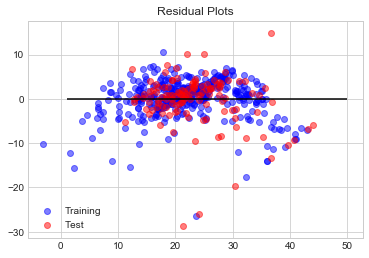

In [120]:
# 学習用データの残差プロット
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)

# テスト用データの残差プロット
test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)

# y=0の水平な線を描く
plt.hlines(y=0, xmin=1.0, xmax=50)

plt.legend((train, test), ('Training','Test'), loc='lower left')
plt.title('Residual Plots')

y=0の周りに残差がランダムにバラけているように見えるので、モデルは良かったと言えそう。
右下の直線的に並んだデータに関して調べてみるのは興味深いかも！？